## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [ ]:
!pip install protobuf~=3.20.3
!pip install tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
def build_mlp():

    input_layer = tf.keras.layers.Input([x_train.shape[-1]])
    x = tf.keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = tf.keras.layers.Dense(units=256, activation="relu")(x)
    x = tf.keras.layers.Dense(units=128, activation="relu")(x)
    out = tf.keras.layers.Dense(units=10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [10]:
model.fit(x_train, y_train,
          epochs=500,
          batch_size=256,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 7s 11ms/step - loss: 2.0685 - accuracy: 0.2550 - val_loss: 1.9984 - val_accuracy: 0.2943
Epoch 2/500
196/196 [==============================] - 2s 8ms/step - loss: 1.8953 - accuracy: 0.3343 - val_loss: 1.9563 - val_accuracy: 0.2794
Epoch 3/500
196/196 [==============================] - 1s 6ms/step - loss: 1.8232 - accuracy: 0.3592 - val_loss: 1.8046 - val_accuracy: 0.3608
Epoch 4/500
196/196 [==============================] - 1s 6ms/step - loss: 1.7708 - accuracy: 0.3785 - val_loss: 1.7669 - val_accuracy: 0.3798
Epoch 5/500
196/196 [==============================] - 1s 6ms/step - loss: 1.7326 - accuracy: 0.3891 - val_loss: 1.8248 - val_accuracy: 0.3523
Epoch 6/500
196/196 [==============================] - 1s 6ms/step - loss: 1.6969 - accuracy: 0.4025 - val_loss: 1.7061 - val_accuracy: 0.4001
Epoch 7/500
196/196 [==============================] - 1s 6ms/step - loss: 1.6672 - accuracy: 0.4159 - val_loss: 1.6837 - val_accuracy: 0.406

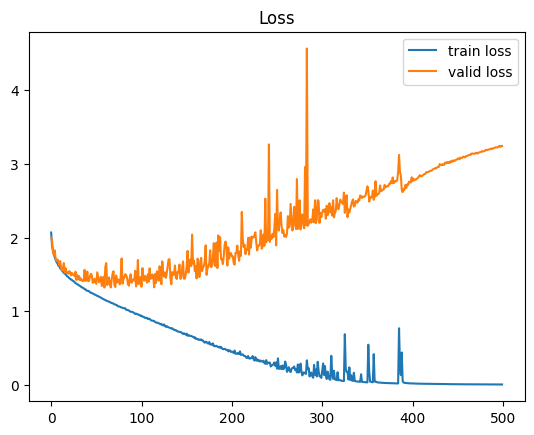

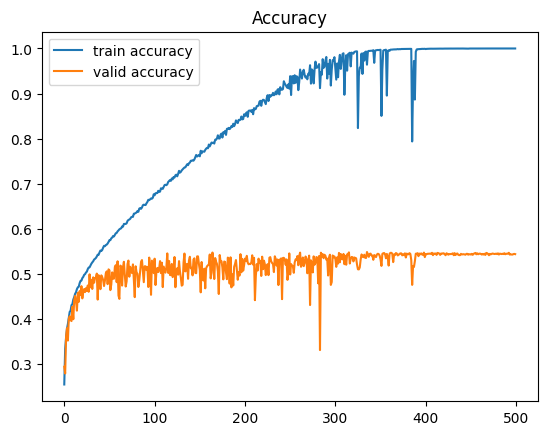

In [11]:
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()